# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
API_URL_base = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{API_URL_base}appid={weather_api_key}&units={units}&q="

#Establish list variables
city_name_lst = []
cloudiness_lst = []
country_lst = []
date_lst =[]
humidity_lst = []
lat_lst =[]
lng_lst = []
max_temp_lst = []
wind_spd_lst = []
index_ctr = 0
set_ctr = 1

print("Starting Data Retrieval")
print("________________________")

#Loop through data
for index, city in enumerate(cities, start = 1):
    try:
        weather_response = requests.get(query_url + city).json()
        city_name_lst.append(weather_response["name"])
        cloudiness_lst.append(weather_response["clouds"]["all"])
        country_lst.append(weather_response["sys"]["country"])
        date_lst.append(weather_response["dt"])
        humidity_lst.append(weather_response["main"]["humidity"])
        lat_lst.append(weather_response["coord"]["lat"])
        lng_lst.append(weather_response["coord"]["lon"])
        max_temp_lst.append(weather_response['main']['temp_max'])
        wind_spd_lst.append(weather_response["wind"]["speed"])
        if index_ctr > 49:
            index_ctr = 0
            set_ctr = set_ctr + 1
    
        else:
            index_ctr = index_ctr + 1
            
        print(f"Processing Record {index_ctr} of Set {set_ctr} : {city}") 
  
    except(KeyError, IndexError):
        print(f"City not found. Skipping... {city}")
        
print("__________________________")
print("Data Retrieval Complete ")    


Starting Data Retrieval
________________________
Processing Record 1 of Set 1 : cockburn town
Processing Record 2 of Set 1 : iqaluit
Processing Record 3 of Set 1 : acaponeta
Processing Record 4 of Set 1 : magadan
Processing Record 5 of Set 1 : cabo san lucas
Processing Record 6 of Set 1 : lebu
Processing Record 7 of Set 1 : bluff
City not found. Skipping... amderma
Processing Record 8 of Set 1 : cedral
Processing Record 9 of Set 1 : klaksvik
City not found. Skipping... taolanaro
Processing Record 10 of Set 1 : hobart
Processing Record 11 of Set 1 : clyde river
Processing Record 12 of Set 1 : qaqortoq
Processing Record 13 of Set 1 : mahebourg
Processing Record 14 of Set 1 : avarua
Processing Record 15 of Set 1 : punta arenas
Processing Record 16 of Set 1 : kahului
Processing Record 17 of Set 1 : nikolskoye
City not found. Skipping... sentyabrskiy
Processing Record 18 of Set 1 : moree
Processing Record 19 of Set 1 : riyadh
City not found. Skipping... nizhneyansk
Processing Record 20 of S

Processing Record 27 of Set 4 : alvaraes
Processing Record 28 of Set 4 : husavik
Processing Record 29 of Set 4 : pohorelice
City not found. Skipping... samalaeulu
Processing Record 30 of Set 4 : coihaique
Processing Record 31 of Set 4 : kysyl-syr
City not found. Skipping... tsihombe
Processing Record 32 of Set 4 : chifeng
Processing Record 33 of Set 4 : zhezkazgan
Processing Record 34 of Set 4 : khymchyn
Processing Record 35 of Set 4 : tobane
Processing Record 36 of Set 4 : garissa
Processing Record 37 of Set 4 : sechura
Processing Record 38 of Set 4 : sitka
Processing Record 39 of Set 4 : poya
Processing Record 40 of Set 4 : canala
Processing Record 41 of Set 4 : cerrito
Processing Record 42 of Set 4 : banjar
Processing Record 43 of Set 4 : port macquarie
Processing Record 44 of Set 4 : carnarvon
Processing Record 45 of Set 4 : hami
Processing Record 46 of Set 4 : butaritari
City not found. Skipping... attawapiskat
Processing Record 47 of Set 4 : hithadhoo
Processing Record 48 of Set 

Processing Record 7 of Set 8 : ghanzi
Processing Record 8 of Set 8 : santa fe
Processing Record 9 of Set 8 : faya
Processing Record 10 of Set 8 : carauari
Processing Record 11 of Set 8 : wewak
Processing Record 12 of Set 8 : te anau
Processing Record 13 of Set 8 : finschhafen
Processing Record 14 of Set 8 : altay
Processing Record 15 of Set 8 : dearborn heights
Processing Record 16 of Set 8 : kruisfontein
Processing Record 17 of Set 8 : carballo
Processing Record 18 of Set 8 : saldanha
Processing Record 19 of Set 8 : bud
Processing Record 20 of Set 8 : nanakuli
Processing Record 21 of Set 8 : kavaratti
Processing Record 22 of Set 8 : namatanai
Processing Record 23 of Set 8 : hohhot
Processing Record 24 of Set 8 : chapais
Processing Record 25 of Set 8 : broome
Processing Record 26 of Set 8 : hachinohe
Processing Record 27 of Set 8 : korla
Processing Record 28 of Set 8 : quartucciu
Processing Record 29 of Set 8 : tevaitoa
Processing Record 30 of Set 8 : labuhan
Processing Record 31 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#Create DataFrame
weather_df = pd.DataFrame({
    "City": city_name_lst,
    "Cloudiness": cloudiness_lst,
    "Country":country_lst,
    "Date":date_lst,
    "Humidity":humidity_lst,
    "Lat":lat_lst,
    "Lng":lng_lst,
    "Max Temp (F)":max_temp_lst,
    "Wind Speed (mph)":wind_spd_lst
    
})

weather_df.count()


City                550
Cloudiness          550
Country             550
Date                550
Humidity            550
Lat                 550
Lng                 550
Max Temp (F)        550
Wind Speed (mph)    550
dtype: int64

In [10]:
#Display DataFrame
weather_df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (f),Wind Speed (mph)
0,Cockburn Town,7,TC,1612848074,77,21.4612,-71.1419,77.67,23.22
1,Iqaluit,75,CA,1612848044,86,63.7506,-68.5145,17.60,2.66
2,Acaponeta,0,MX,1612848267,74,22.4964,-105.3594,61.57,1.92
3,Magadan,98,RU,1612848268,91,59.5667,150.8000,16.34,21.23
4,Cabo San Lucas,1,MX,1612847982,82,22.8909,-109.9124,63.00,11.50
...,...,...,...,...,...,...,...,...,...
545,Aksarka,68,RU,1612848391,85,66.5606,67.7975,-25.73,8.59
546,Savonlinna,90,FI,1612848391,85,61.8699,28.8800,3.20,3.44
547,Kabompo,100,ZM,1612848391,97,-13.5927,24.2008,66.00,4.50
548,Darlawn,0,IN,1612848391,49,24.0167,92.9000,73.40,3.44


In [11]:
#Save data into CSV
weather_df.to_csv("output_data/cities1.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

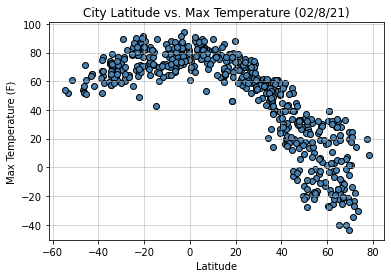

In [13]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp (F)"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (02/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


In [19]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Max Temperature.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

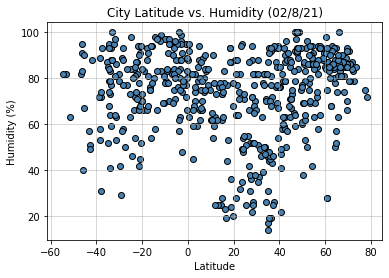

In [15]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (02/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


In [17]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Humidity.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

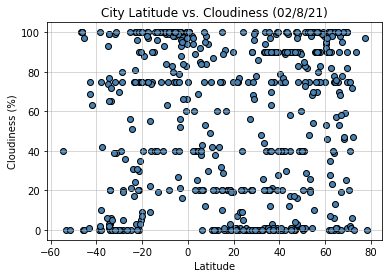

In [20]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (02/8/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

In [21]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Cloudiness.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

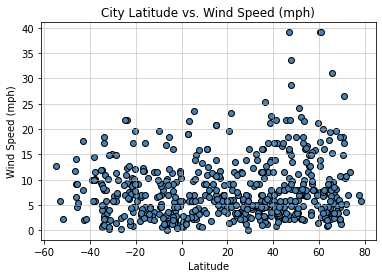

In [23]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed (mph)"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

In [24]:
# Save figure as .png file
plt.savefig("output_data/City Latitude vs Wind Speed.png")

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [31]:
#separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
north_hemi = weather_df.loc[weather_df["Lat"] >= 0]
south_hemi = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression